In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from datetime import datetime, timedelta

In [2]:
df = pd.read_csv("data.csv", encoding='ISO-8859-1')


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df = pd.DataFrame(df)

In [6]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%m/%d/%Y %H:%M')

In [7]:
# Calculate the last purchase date for each customer
last_purchase_date = df.groupby('CustomerID')['InvoiceDate'].max()


In [8]:
# Set the current date as of the latest invoice date in the dataset
current_date = last_purchase_date.max()


In [9]:
# Define the churn threshold (e.g., 90 days)
churn_threshold = timedelta(days=90)

In [10]:
# Identify churned customers
churned_customers = last_purchase_date[last_purchase_date < (current_date - churn_threshold)]

In [11]:
print(churned_customers)

CustomerID
12346.0   2011-01-18 10:17:00
12350.0   2011-02-02 16:01:00
12353.0   2011-05-19 17:47:00
12354.0   2011-04-21 13:11:00
12355.0   2011-05-09 13:49:00
                  ...        
18262.0   2011-07-22 16:04:00
18268.0   2011-07-28 19:13:00
18269.0   2010-12-16 15:39:00
18280.0   2011-03-07 09:52:00
18281.0   2011-06-12 10:53:00
Name: InvoiceDate, Length: 1454, dtype: datetime64[ns]


In [12]:
# Create a new column 'Churned' in the DataFrame
df['Churned'] = df['CustomerID'].isin(churned_customers.index)

In [13]:
print("DataFrame with 'Churned' Column:")
print(df)

DataFrame with 'Churned' Column:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Cus

In [14]:
# Count True and False values in 'Churned' column for unique CustomerIDs
churn_counts = df.groupby('CustomerID')['Churned'].value_counts().unstack(fill_value=0)

# Display the counts
print("Churned and Non-Churned Customer Counts:")
print(churn_counts)

Churned and Non-Churned Customer Counts:
Churned     False  True 
CustomerID              
12346.0         0      2
12347.0       182      0
12348.0        31      0
12349.0        73      0
12350.0         0     17
...           ...    ...
18280.0         0     10
18281.0         0      7
18282.0        13      0
18283.0       756      0
18287.0        70      0

[4372 rows x 2 columns]


In [16]:
 #Count unique CustomerIDs
unique_customer_count = df['CustomerID'].nunique()

# Display the count
print("Number of Unique Customer IDs:", unique_customer_count)

Number of Unique Customer IDs: 4372


In [19]:
import pandas as pd

# Assuming your DataFrame is already loaded into df

# Count total unique customers (excluding NaN)
total_unique_customers = df['CustomerID'].nunique(dropna=True)

# Count churned and non-churned customers for unique customer IDs
unique_customer_churn_counts = df.groupby('CustomerID')['Churned'].max().value_counts(dropna=False)

# Display the counts
print("Total Unique Customers:", total_unique_customers)
print("Churned and Non-Churned Customer Counts for Unique Customer IDs:")
print(unique_customer_churn_counts)


Total Unique Customers: 4372
Churned and Non-Churned Customer Counts for Unique Customer IDs:
False    2918
True     1454
Name: Churned, dtype: int64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   Churned      541909 non-null  bool          
 9   Segment      4372 non-null    object        
dtypes: bool(1), datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.7+ MB


In [54]:
# Drop the 'Segment' column
df = df.drop(columns=['Segment'])

C:\Users\1234\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1234\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1234\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\1234\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_

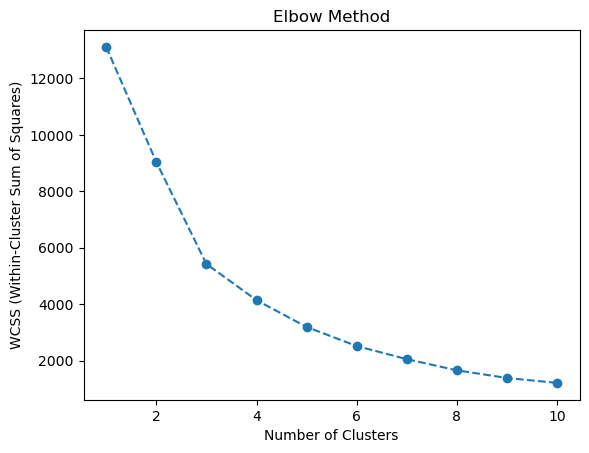

C:\Users\1234\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


DataFrame with 'Cluster' Column:
            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0        4736          2         1        2
12347.0        4413          7      2458        1
12348.0        4486          4      2341        1
12349.0        4429          1       631        1
12350.0        4721          1       197        2


In [58]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming your DataFrame is already loaded into df

# Calculate Recency, Frequency, and Monetary values for each customer
recency = df.groupby('CustomerID')['InvoiceDate'].max()
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique()
monetary = df.groupby('CustomerID')['Quantity'].sum()

# Create a new DataFrame for RFM values
rfm_df = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
})

# Handle zero values in 'Frequency' and 'Monetary'
rfm_df['Frequency'] = rfm_df['Frequency'].replace(0, 1)
rfm_df['Monetary'] = rfm_df['Monetary'].replace(0, 1)

# Check and drop rows with missing values in RFM DataFrame
rfm_df = rfm_df.dropna(subset=['Recency', 'Frequency', 'Monetary'])

# Convert 'Recency' to numeric representation (you can choose a method based on your requirement)
rfm_df['Recency'] = (pd.to_datetime('today') - rfm_df['Recency']).dt.days

# Standardize the features (important for K-Means)
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Determine the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.show()

# Based on the Elbow Method, choose the optimal number of clusters (let's say 3)
n_clusters = 3

# Apply K-Means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Display the updated DataFrame with the 'Cluster' column
print("DataFrame with 'Cluster' Column:")
print(rfm_df.head())


In [59]:
print(rfm_df)

            Recency  Frequency  Monetary  Cluster
CustomerID                                       
12346.0        4736          2         1        2
12347.0        4413          7      2458        1
12348.0        4486          4      2341        1
12349.0        4429          1       631        1
12350.0        4721          1       197        2
...             ...        ...       ...      ...
18280.0        4688          1        45        2
18281.0        4591          1        54        2
18282.0        4418          3        98        1
18283.0        4414         16      1397        1
18287.0        4453          3      1586        1

[4372 rows x 4 columns]


In [61]:
# Merge df with rfm_df on 'CustomerID'
df = pd.merge(df, rfm_df[['Cluster', 'Cluster Name']], left_on='CustomerID', right_index=True, how='left')

# Display the updated DataFrame with the 'Cluster Name' column
print("DataFrame with 'Cluster Name' Column:")
print(df.head())


DataFrame with 'Cluster Name' Column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Churned  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     True   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     True   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     True   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     True   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     True   

   Cluster         Cluster Name  
0      2.0  Low-Value Customers  
1      2.0  Low-Value 

In [62]:
# Save the DataFrame to a CSV file for importing into Power BI
df.to_csv('customer_segmentation1.csv', index=False)